initializing

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('food.csv')
df=df[:8000]
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
7995,7996,B001M09ATY,A2CW9XSV8YTGKK,Brian J. Binder,0,0,5,1316044800,Fanastic,Can't find this product anywhere locally - tha...
7996,7997,B001M09ATY,AAFT7UQI6TOGE,"J. Diaz ""wanna be a balabusta""",0,0,4,1300406400,Oatmeal makes for winter warmth,My kids have eaten oatmeal everyday since the ...
7997,7998,B001M09ATY,A13WBUX01Q4D35,A. Beckstedt,0,0,5,1296950400,An oatmeal explosion of goodness,"Are you sick of the regular flavors? Plain, ap..."
7998,7999,B001M09ATY,A22097Y3ZY7M14,Don D.,0,0,5,1249948800,Quaker Instant Oatmeal Bakery Favorites,This particular variety box contains 3 of my v...


In [22]:
df['Summary'].value_counts()

Delicious                                      33
Yummy!                                         33
Delicious!                                     30
Great product                                  22
Great                                          20
                                               ..
Not worth it!                                   1
Don't bother                                    1
Pretty good stuff, with the right sweetener     1
Not So Much!                                    1
Sorry excuse for oatmeal                        1
Name: Summary, Length: 7180, dtype: int64

Exploratory data analysis (EDA)

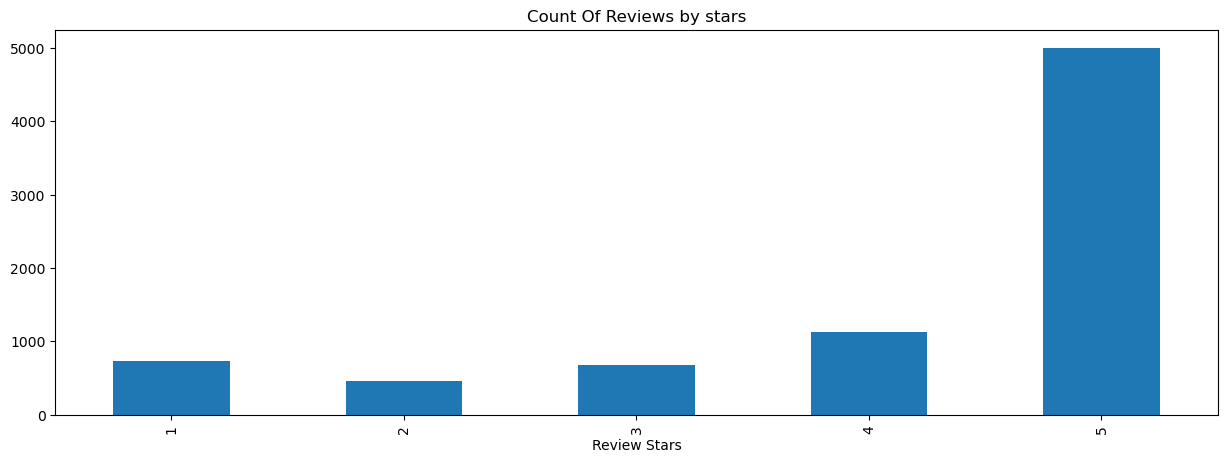

In [23]:
ax = df.Score.value_counts().sort_index().plot(kind = "bar", title = "Count Of Reviews by stars",
                                           figsize= (15,5))
ax.set_xlabel('Review Stars')
plt.show()

<AxesSubplot:xlabel='Summary', ylabel='count'>

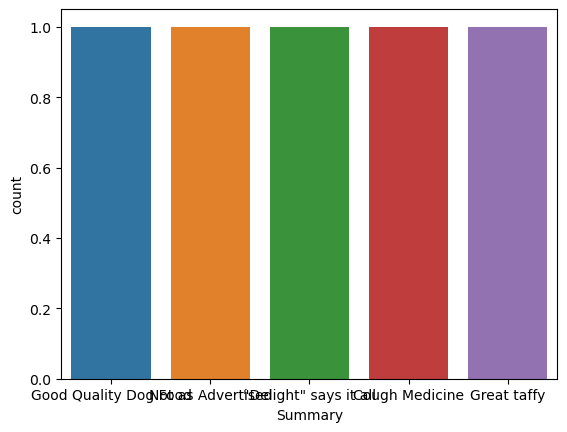

In [24]:
import seaborn as sns
sns.countplot(x='Summary',data=df.head())

In [25]:
positive_review = list(df[df['Score']>3]['Text'])
negative_review = list(df[df['Score']<=3]['Text'])
y =[]
for i in df['Score']:
      if i>3:
        y.append(1)
      else:
        y.append(0)
df['Score']=y

In [26]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 
stopwords=set(STOPWORDS)
#stopwords

In [27]:
def create_cloud(string, title=None):
    cloud = WordCloud(height=1080, 
                      width=1920, 
                      background_color='white', 
                      min_font_size=10, 
                      stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(10,20))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':24})
    plt.show()

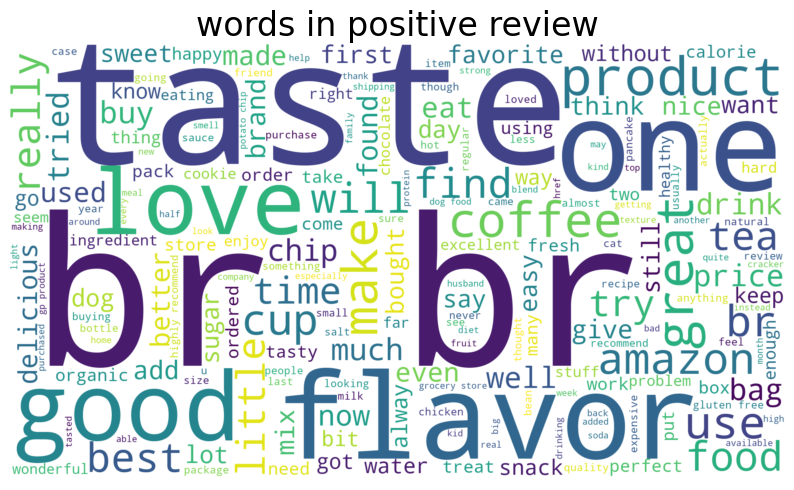

In [28]:
create_cloud(' '.join(positive_review).lower(),'words in positive review')


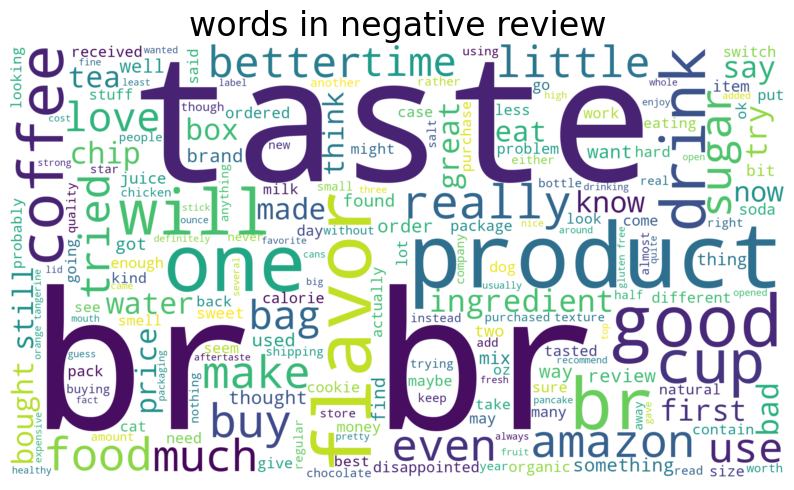

In [29]:
create_cloud(' '.join(negative_review).lower(),'words in negative review')

In [30]:
def text_processing(data):
    from bs4 import BeautifulSoup
    import re
    def decontracted(phrase):
        # specific
        phrase= re.sub(r'<br /><br />',' ',phrase)
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r'"', " ", phrase)
        return phrase
    stopwords=set(STOPWORDS)

    # Combining all the above stundents 
    from tqdm import tqdm
    preprocessed_Text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data['Text'].values):
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split() if e not in stopwords)
        preprocessed_Text.append(sentance.strip())
    
    from nltk.stem import PorterStemmer

    porter = PorterStemmer()
    list2=[]
    for  sentence in preprocessed_Text:
      list1=[]
      for words in sentence.split():
        list1.append(porter.stem(words))

      list2.append(' '.join(list1))
    return(list2)

In [31]:
x=text_processing(df)

100%|████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:04<00:00, 1816.76it/s]


In [32]:
df['cleaned_review']=x

In [33]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i bought sever vital can dog food product foun...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanuts...th pe...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"thi confect around centuries. it light, pillow..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,if look secret ingredi robitussin i believ i f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffi great price. there wide assort yum...


In [34]:
X = df['cleaned_review']
Y = df['Score']

In [35]:
#Libraries

In [36]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [37]:
from time import time
start=time()

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_train_bow = X_train_bow.toarray()

# Preprocess and transform the test data
X_test_bow = vectorizer.transform(X_test)
X_test_bow = X_test_bow.toarray()


different models for compare 

In [40]:

# List of models to try
models = [KNeighborsClassifier(),
          GaussianNB(),
          LogisticRegression(),
          RandomForestClassifier(),
          DecisionTreeClassifier(),
          GradientBoostingClassifier(),
         ]

# Hyperparameters to try
param_grid = {'KNeighborsClassifier': {'n_neighbors': [10,12,14,16,18,20,22,24,26,28,30]},
              'GaussianNB': {'var_smoothing': [.00001,.0001,.001,0.01,0.1,1,10]},
              'LogisticRegression':{'C': [.00001,.0001,.001,0.01,0.1,1,10]},
              'RandomForestClassifier': {'n_estimators': [100, 200], 'max_depth': [80,90],'max_features': [2, 3]},
              'DecisionTreeClassifier': {'max_depth': [3, 5, 70,85]},
              'GradientBoostingClassifier': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.5, 1]}
             }


# Dataframe to store results
metrics = {'Model': [], 'ATR': [], 'ATS': [], 'F1_TR': [], 'F1_TS': [], 'B_P': []}

# Looping through models
for i, model in enumerate(models):
    # Get model name
    model_name = str(model).replace("()","")
    # model_names.append(model_name)
    # Perform grid search with cross-validation
    gs = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=5, n_jobs =-1)
    gs.fit(X_train_bow, y_train)
    
    # Get best parameters
    best_params = gs.best_params_
    print(f"Best Paramenters for {model_name} is {best_params}")

    # Fit model with best parameters
    model.set_params(**best_params)
    model.fit(X_train_bow, y_train)
    y_pred_train = model.predict(X_train_bow)
    y_pred_test = model.predict(X_test_bow)

    # Append in a list for future use
    # basic_models.append(model)
    # Make predictions
    y_pred_train = model.predict(X_train_bow)
    y_pred_test = model.predict(X_test_bow)

    # Calculate metrics
    accuracy_train = accuracy_score(y_pred_train,y_train)
    accuracy_test = accuracy_score(y_pred_test,y_test)
    f1_train=f1_score(y_pred_train,y_train)
    f1_test = f1_score(y_pred_test,y_test)
    
    # Append to DataFrame
    metrics['Model'].append(model_name)    
    metrics['ATR'].append(f"{accuracy_train:.3f}")
    metrics['ATS'].append(f"{accuracy_test:.3f}")
    metrics['F1_TR'].append(f"{f1_train:.3f}")
    metrics['F1_TS'].append(f"{f1_test:.3f}")
    metrics['B_P'].append(best_params)
    
    
    metrics_df = pd.DataFrame(metrics)
    

    print(f"{model.__class__.__name__}: accuracy_train={accuracy_train:.4f} accuracy_test={accuracy_test:.4f} f1_train={f1_train:.4f}, f1_test = {f1_test:.4f}")
    print()

Best Paramenters for KNeighborsClassifier is {'n_neighbors': 10}
KNeighborsClassifier: accuracy_train=0.7805 accuracy_test=0.7729 f1_train=0.8738, f1_test = 0.8701

Best Paramenters for GaussianNB is {'var_smoothing': 0.01}
GaussianNB: accuracy_train=0.8486 accuracy_test=0.7937 f1_train=0.9073, f1_test = 0.8749

Best Paramenters for LogisticRegression is {'C': 1}
LogisticRegression: accuracy_train=0.9864 accuracy_test=0.8450 f1_train=0.9912, f1_test = 0.9007

Best Paramenters for RandomForestClassifier is {'max_depth': 80, 'max_features': 2, 'n_estimators': 100}
RandomForestClassifier: accuracy_train=0.7736 accuracy_test=0.7688 f1_train=0.8711, f1_test = 0.8691

Best Paramenters for DecisionTreeClassifier is {'max_depth': 5}
DecisionTreeClassifier: accuracy_train=0.7898 accuracy_test=0.7817 f1_train=0.8776, f1_test = 0.8724

Best Paramenters for GradientBoostingClassifier is {'learning_rate': 0.1, 'n_estimators': 200}
GradientBoostingClassifier: accuracy_train=0.8707 accuracy_test=0.82

best parameters with table

In [41]:
table = PrettyTable()
table.add_column("Model Name", metrics['Model'])
table.add_column("Accu_train",metrics['ATR'])
table.add_column("Accu_test",metrics['ATS'])
table.add_column("F1_train",metrics['F1_TR'])
table.add_column("F1_test",metrics['F1_TS'])
table.add_column("Best parameters",metrics['B_P'])

In [42]:
print(table)

+----------------------------+------------+-----------+----------+---------+-----------------------------------------------------------+
|         Model Name         | Accu_train | Accu_test | F1_train | F1_test |                      Best parameters                      |
+----------------------------+------------+-----------+----------+---------+-----------------------------------------------------------+
|    KNeighborsClassifier    |   0.781    |   0.773   |  0.874   |  0.870  |                    {'n_neighbors': 10}                    |
|         GaussianNB         |   0.849    |   0.794   |  0.907   |  0.875  |                  {'var_smoothing': 0.01}                  |
|     LogisticRegression     |   0.986    |   0.845   |  0.991   |  0.901  |                          {'C': 1}                         |
|   RandomForestClassifier   |   0.774    |   0.769   |  0.871   |  0.869  | {'max_depth': 80, 'max_features': 2, 'n_estimators': 100} |
|   DecisionTreeClassifier   |   0.790   

In [43]:
best=metrics_df.sort_values(by = ['ATR','F1_TR'], ascending=False).set_index('Model')
print(best)
print()
print(f"Best Model is : \033[1m{best.index[0]}\033[0m with the best parameters : \033[1m{best.iloc[0,-1]}\033[0m")

                              ATR    ATS  F1_TR  F1_TS  \
Model                                                    
LogisticRegression          0.986  0.845  0.991  0.901   
GradientBoostingClassifier  0.871  0.825  0.922  0.895   
GaussianNB                  0.849  0.794  0.907  0.875   
DecisionTreeClassifier      0.790  0.782  0.878  0.872   
KNeighborsClassifier        0.781  0.773  0.874  0.870   
RandomForestClassifier      0.774  0.769  0.871  0.869   

                                                                          B_P  
Model                                                                          
LogisticRegression                                                   {'C': 1}  
GradientBoostingClassifier        {'learning_rate': 0.1, 'n_estimators': 200}  
GaussianNB                                            {'var_smoothing': 0.01}  
DecisionTreeClassifier                                       {'max_depth': 5}  
KNeighborsClassifier                                   

Finalizing the model with best result

In [44]:
final = LogisticRegression()
final.set_params(**{'C': 0.1})
final.fit(X_train_bow, y_train)

y_pred_train = final.predict(X_train_bow)


Classification Report

In [45]:
print(classification_report(y_pred_train,y_train,target_names=['Not_good_food','good_food']))

               precision    recall  f1-score   support

Not_good_food       0.71      0.97      0.82       960
    good_food       0.99      0.92      0.95      4640

     accuracy                           0.93      5600
    macro avg       0.85      0.94      0.89      5600
 weighted avg       0.94      0.93      0.93      5600



<AxesSubplot:>

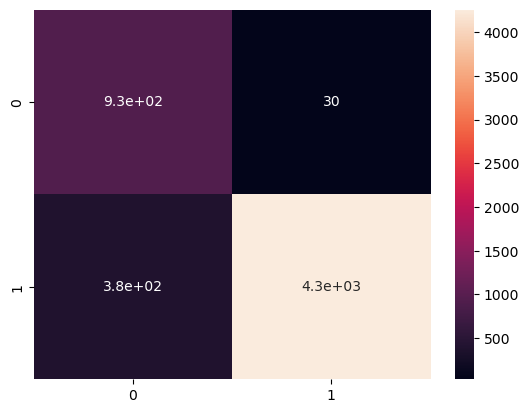

In [46]:
c= confusion_matrix(y_pred_train, y_train)
sns.heatmap(c, annot=True)

<AxesSubplot:>

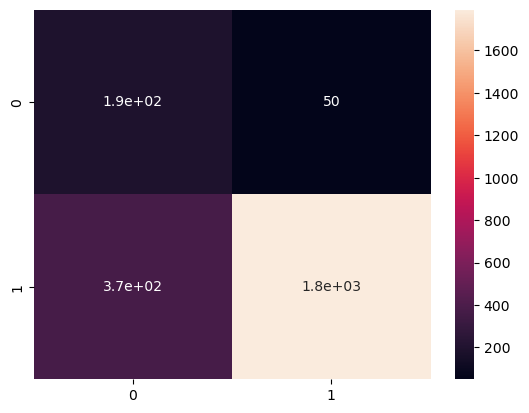

In [47]:
c= confusion_matrix(y_pred_test, y_test)
sns.heatmap(c, annot=True)

In [48]:
end=time()
total_time=end-start
minute=int(total_time/60)
second=total_time%60
print('Total execution time is : {}'.format(total_time))
print(f"Which translates to: {minute} minutes and {second:.3f} seconds.")

Total execution time is : 9948.988665103912
Which translates to: 165 minutes and 48.989 seconds.
